# Classification Using Logits

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [4]:
# Bunch object acts like a dictionary, so you can inspect the keys 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# check data
data.data.shape
# 569 rows with 30 features

(569, 30)

In [6]:
# check target
data.target.shape

(569,)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# check traget names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
#check feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,  test_size=0.33)
N,D = X_train.shape

In [11]:
# scale dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build and Train

In [16]:
# Build model
# model = nn.Sequential(
#         nn.Linear(D,1),
#         nn.Sigmoid()
# )

# Instead of building a two step sequential model we will combine the sigmoid with the loss

model = nn.Linear(D,1)

In [17]:
# loss & optimizer
criterion = nn.BCEWithLogitsLoss() # combine the sigmoid with the loss
optimizer = torch.optim.Adam(model.parameters())

In [14]:
# Convert to torch and typecast
X_train = torch.from_numpy(X_train.astype(np.float32))
#X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1)) #since y is 1D convert to 2D
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [18]:
# train the model
n_epochs = 1000
# store both the train and test loss
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    # zero gradients 
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    #backward and optimize
    loss.backward()
    optimizer.step()

    #get test loss by gettinng the model output on test data
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    #save train and test loss
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    
    #print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item(): 4f}')
    if (it + 1) % 50 == 0: # print every 50 epochs
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.5583, Test Loss: 0.5344
Epoch 100/1000, Train Loss: 0.3970, Test Loss: 0.3835
Epoch 150/1000, Train Loss: 0.3127, Test Loss: 0.3069
Epoch 200/1000, Train Loss: 0.2611, Test Loss: 0.2608
Epoch 250/1000, Train Loss: 0.2261, Test Loss: 0.2298
Epoch 300/1000, Train Loss: 0.2009, Test Loss: 0.2074
Epoch 350/1000, Train Loss: 0.1817, Test Loss: 0.1905
Epoch 400/1000, Train Loss: 0.1668, Test Loss: 0.1772
Epoch 450/1000, Train Loss: 0.1548, Test Loss: 0.1666
Epoch 500/1000, Train Loss: 0.1449, Test Loss: 0.1578
Epoch 550/1000, Train Loss: 0.1366, Test Loss: 0.1505
Epoch 600/1000, Train Loss: 0.1295, Test Loss: 0.1443
Epoch 650/1000, Train Loss: 0.1234, Test Loss: 0.1390
Epoch 700/1000, Train Loss: 0.1181, Test Loss: 0.1344
Epoch 750/1000, Train Loss: 0.1133, Test Loss: 0.1303
Epoch 800/1000, Train Loss: 0.1091, Test Loss: 0.1268
Epoch 850/1000, Train Loss: 0.1054, Test Loss: 0.1236
Epoch 900/1000, Train Loss: 0.1020, Test Loss: 0.1208
Epoch 950/1000, Train Loss: 0

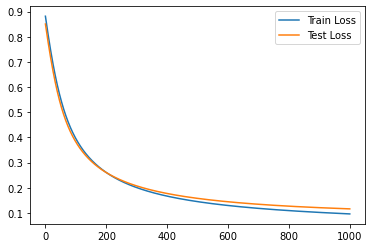

In [19]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

## Evaluation

In [21]:
# get accuracy
with torch.no_grad():
    # train accuracy
    p_train = model(X_train)
    #p_train = np.round(p_train.numpy()) # convert the tensor to numpy and round
    p_train = (p_train.numpy() > 0) # With logits anything > 0 is a 1 prediction and < 0 is a 0 
    train_acc = np.mean(y_train.numpy() == p_train) # get an array of True or False (0 & 1) and take the mean

    # test accuracy
    p_test = model(X_test)
    #p_test = np.round(p_test.numpy())
    p_test = (p_test.numpy() > 0)
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train Accuracy:{train_acc: .4f}, Test Accuracy: {test_acc: .4f}") 

Train Accuracy: 0.9843, Test Accuracy:  0.9734


## Load and Save Model

In [40]:
# Save model - we will need the state dict of the model
model.state_dict()
# ordered dictionary of the model model parameters, the weight matrix and the bias vector

OrderedDict([('0.weight',
              tensor([[-0.2884, -0.3510, -0.4264, -0.3521, -0.3430, -0.1688, -0.2269, -0.2182,
                       -0.2388,  0.5398, -0.2250, -0.0055, -0.4744, -0.4144, -0.2164,  0.1275,
                        0.0098, -0.1244,  0.2192,  0.3799, -0.3020, -0.4454, -0.4135, -0.5099,
                       -0.4070, -0.3879, -0.3419, -0.2045, -0.3148, -0.1181]])),
             ('0.bias', tensor([0.4724]))])

In [41]:
torch.save(model.state_dict(), 'model.pt')

In [42]:
# load a saved model
# will need to recreate the structure and then load the parameters
model2 = nn.Sequential(
            nn.Linear(D,1),
            nn.Sigmoid()
)
model2.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>